In [21]:
with open('examples/3sat.dimacs', 'r', encoding='utf8') as f:
    dimacs = f.read()
print(dimacs)  # let's check the file is as promised

c example DIMACS-CNF 3-SAT
p cnf 3 5
-1 -2 -3 0
1 -2 3 0
1 2 -3 0
1 -2 -3 0
-1 2 3 0


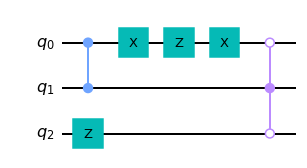

In [22]:
from qiskit.circuit.library import PhaseOracle
oracle = PhaseOracle.from_dimacs_file('examples/3sat.dimacs')
oracle.draw(output="mpl")

In [ ]:
"""This circuit above acts similarly to the databases we described before. 
The input to this circuit is a string of 3 bits, 
and the output given depends on whether the input string is 
a solution to the SAT problem or not."""

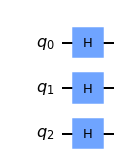

In [23]:
from qiskit import QuantumCircuit
init = QuantumCircuit(3)
init.h([0,1,2])
init.draw(output="mpl")

In [24]:
# steps 2 & 3 of Grover's algorithm
from qiskit.circuit.library import GroverOperator
grover_operator = GroverOperator(oracle)

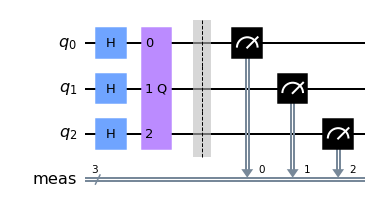

In [26]:
qc = init.compose(grover_operator)
qc.measure_all()
qc.draw(output="mpl")

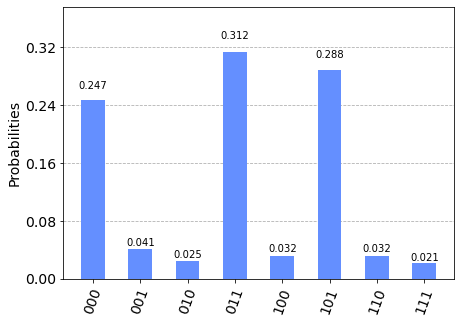

In [27]:
# Simulate the circuit
from qiskit import Aer, transpile
sim = Aer.get_backend('aer_simulator')
t_qc = transpile(qc, sim)
counts = sim.run(t_qc).result().get_counts()

# plotting the results
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [48]:
# Real quantum computer results
from qiskit import IBMQ
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-12-26 17:44:16,757: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [37]:
provider = IBMQ.get_provider("ibm-q")
grover = provider.get_backend("ibmq_quito")

In [39]:
job = execute(qc,backend=grover)

In [40]:
from qiskit.tools.monitor import job_monitor

In [41]:
job_monitor(job)

Job Status: job has successfully run


In [42]:
result = job.result()

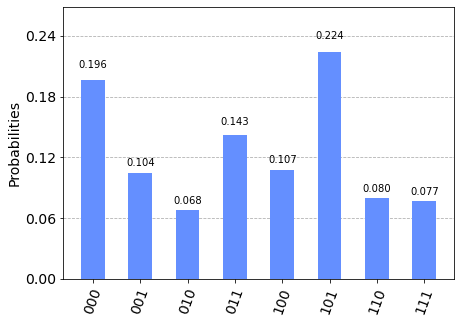

In [45]:
from qiskit.tools.visualization import plot_histogram

plot_histogram(result.get_counts(qc))

In [46]:
# Circuits for Grover's algorithm

from qiskit import QuantumCircuit

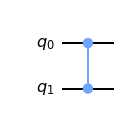

In [47]:
oracle = QuantumCircuit(2)
oracle.cz(0,1)
oracle.draw(output="mpl")

In [49]:
def display_unitary(qc, prefix=""):
    # DocString
    """Simulates a simple circuit and display its matrix representation.
    Args:
        qc (QuantumCircuit): The circuit to compile to a unitary matrix
        prefix (str): Optional LaTeX to be displayed before the matrix
    Returns:
        None (displays matrix as side effect)
    """
    from qiskit import Aer
    from qiskit.visualization import array_to_latex
    sim = Aer.get_backend('aer_simulator')
    qc=qc.copy()
    qc.save_unitary()
    unitary = sim.run(qc).result().get_unitary()
    display(array_to_latex(unitary,prefix=prefix))

display_unitary(oracle,"U_\\text{oracle}=")


<IPython.core.display.Latex object>

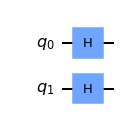

In [50]:
diffuser = QuantumCircuit(2)
diffuser.h([0, 1])
diffuser.draw(output="mpl")

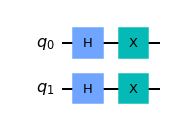

In [51]:
diffuser.x([0, 1])
diffuser.draw(output="mpl")

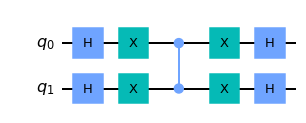

In [52]:
diffuser.cz(0,1)
diffuser.x([0,1])
diffuser.h([0,1])
diffuser.draw(output="mpl")

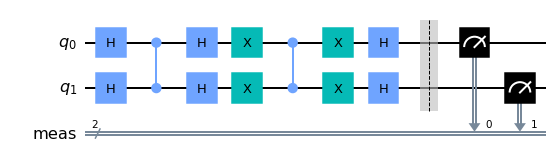

In [53]:
grover = QuantumCircuit(2)
grover.h([0, 1])
grover = grover.compose(oracle)
grover = grover.compose(diffuser)
grover.measure_all()
grover.draw(output = "mpl")

In [54]:
from qiskit import Aer
sim = Aer.get_backend("aer_simulator")
sim.run(grover).result().get_counts()

{'11': 1024}